<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson04_RDKit/lecture_note_RDKit_no1_%E5%88%86%E5%AD%90%E3%81%AE%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF%E3%81%A8%E8%A1%A8%E7%A4%BA%E3%81%A8%E5%87%BA%E5%8A%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. インストールなど

In [1]:
!pip install pubchempy
!pip install rdkit==2022.3.5

## 1.1.1 rdkit.Chem.MolFromSmiles(smiles)

In [2]:
import pubchempy as pcp
quercetine = pcp.get_compounds('quercetine', 'name')
quercetine_smiles = quercetine[0].isomeric_smiles
quercetine_smiles

'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'

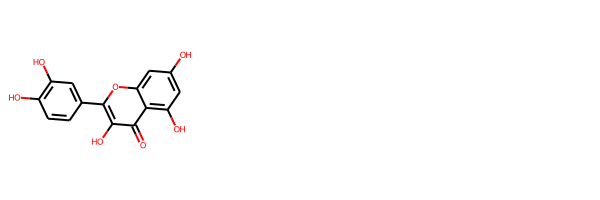

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
quercetine_mol = Chem.MolFromSmiles(quercetine_smiles)
Draw.MolsToGridImage([quercetine_mol])

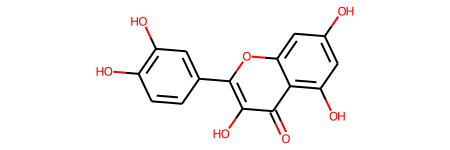

In [4]:
from rdkit.Chem.Draw import IPythonConsole
quercetine_mol

## 1.1.2 rdkit.Chem.MolFromMolBlock(mol_block)

In [5]:
quercetine_sdf = pcp.get_sdf('quercetine', 'name')
print(quercetine_sdf)

5280343
  -OEChem-10312300032D

 32 34  0     0  0  0  0  0  0999 V2000
    6.0682   -0.2704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003    1.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.3198    2.7642    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    2.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5381   -0.2945    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.6663   -2.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   10.3984   -1.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003   -0.2704    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    1.7296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3083    1.76

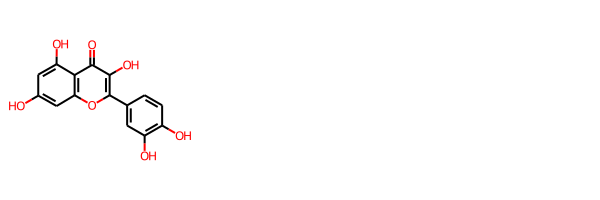

In [6]:
quercetine_mol_fromSDF = Chem.MolFromMolBlock(quercetine_sdf)
Draw.MolsToGridImage([quercetine_mol_fromSDF])

## 1.1.3 rdkit.Chem.MolFromInchi(Inchi)

In [7]:
quercetine_inchi = quercetine[0].inchi
quercetine_inchi

'InChI=1S/C15H10O7/c16-7-4-10(19)12-11(5-7)22-15(14(21)13(12)20)6-1-2-8(17)9(18)3-6/h1-5,16-19,21H'

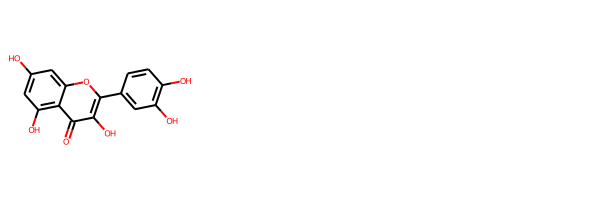

In [8]:
Draw.MolsToGridImage([Chem.MolFromInchi(quercetine_inchi)])

# 1.2 複数分子の読み込み

## 複数分子データの取得と保存


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!wget -P /content/drive/MyDrive/data https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson04_RDKit/data/PubChem_TCI_phenol_records.sdf

--2023-10-31 04:04:05--  https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson04_RDKit/data/PubChem_TCI_phenol_records.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373649 (365K) [text/plain]
Saving to: ‘/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf.1’

PubChem_TCI_phenol_ 100%[===================>] 364.89K  --.-KB/s    in 0.05s   

2023-10-31 04:04:06 (6.58 MB/s) - ‘/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf.1’ saved [373649/373649]



,PUBCHEM_COMPOUND_ID_TYPE,PUBCHEM_TOTAL_CHARGE,PUBCHEM_SUBSTANCE_ID,PUBCHEM_SUBSTANCE_VERSION,PUBCHEM_EXT_DATASOURCE_NAME,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_XREF_EXT_ID,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_SUBSTANCE_URL,PUBCHEM_CID_ASSOCIATIONS,PUBCHEM_COORDINATE_TYPE,ID,ROMol,PUBCHEM_BONDANNOTATIONS,PUBCHEM_SUBSTANCE_COMMENT,PUBCHEM_GENERIC_REGISTRY_NAME
0,0,0,354335558,1,TCI (Tokyo Chemical Industry),A3190,4-[1-Hydroxy-2-[[6-(4-phenylbutoxy)hexyl]amino...,A3190,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,56801 1\n5152 2\n6844 2,1\n3,354335558,,NaN,NaN,NaN
1,0,0,354335473,1,TCI (Tokyo Chemical Industry),C3355,2-Chloro-4-(trifluoromethyl)phenol\nC3355,C3355,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,2736603 1,1\n3,354335473,,NaN,NaN,NaN

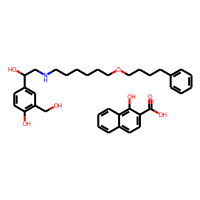
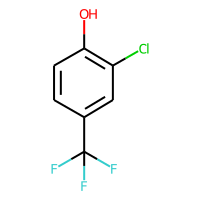

In [11]:
from rdkit.Chem import PandasTools

df = PandasTools.LoadSDF('/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf')
df.head(2)

,PUBCHEM_COMPOUND_ID_TYPE,PUBCHEM_TOTAL_CHARGE,PUBCHEM_SUBSTANCE_ID,PUBCHEM_SUBSTANCE_VERSION,PUBCHEM_EXT_DATASOURCE_NAME,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_XREF_EXT_ID,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_SUBSTANCE_URL,PUBCHEM_CID_ASSOCIATIONS,PUBCHEM_COORDINATE_TYPE,ID,ROMol,PUBCHEM_BONDANNOTATIONS,PUBCHEM_SUBSTANCE_COMMENT,PUBCHEM_GENERIC_REGISTRY_NAME,smiles
0,0,0,354335558,1,TCI (Tokyo Chemical Industry),A3190,4-[1-Hydroxy-2-[[6-(4-phenylbutoxy)hexyl]amino...,A3190,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,56801 1\n5152 2\n6844 2,1\n3,354335558,,NaN,NaN,NaN,O=C(O)c1ccc2ccccc2c1O.OCc1cc(C(O)CNCCCCCCOCCCC...
1,0,0,354335473,1,TCI (Tokyo Chemical Industry),C3355,2-Chloro-4-(trifluoromethyl)phenol\nC3355,C3355,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,2736603 1,1\n3,354335473,,NaN,NaN,NaN,Oc1ccc(C(F)(F)F)cc1Cl

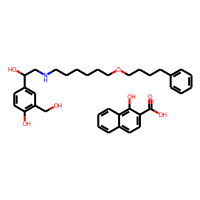
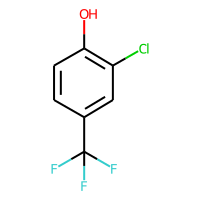

In [12]:
df["smiles"] = df["ROMol"].map(Chem.MolToSmiles)
df.head(2)

In [13]:
!wget https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson02_jupyter/data/compounds-structures.csv

import pandas as pd
df_phenol = pd.read_csv("compounds-structures.csv")
df_phenol.head(2)

--2023-10-31 04:04:07--  https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson02_jupyter/data/compounds-structures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102631 (100K) [text/plain]
Saving to: ‘compounds-structures.csv’

compounds-structure 100%[===================>] 100.23K  --.-KB/s    in 0.03s   

2023-10-31 04:04:07 (3.06 MB/s) - ‘compounds-structures.csv’ saved [102631/102631]



,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.580,C32H31O14,NaN,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC
1,5,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,Flavonoids,Anthocyanins,Delphinidin 3-O-(6''-acetyl-galactoside),507.421,C23H23O13,NaN,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC


,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at,ROMol
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.580,C32H31O14,NaN,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC,
1,5,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,Flavonoids,Anthocyanins,Delphinidin 3-O-(6''-acetyl-galactoside),507.421,C23H23O13,NaN,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC,

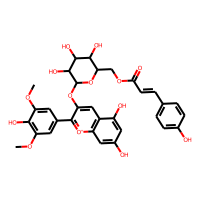
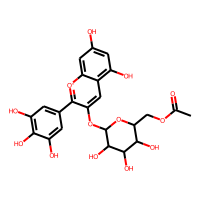

In [14]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df_phenol, "smiles")
df_phenol.head(2)